##DeepLearning Project in 2020

In [4]:
pip install konlpy

     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 3.6MB 57.6MB/s 
     |████████████████████████████████| 92kB 12.8MB/s 
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [5]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from collections import Counter
from google.colab import drive

drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


###데이터 로드

In [6]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7f62a3d8d6a0>)

In [7]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [8]:
len(train_data) # 훈련용 리뷰 개수 출력

150000

In [9]:
train_data[:5]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [10]:
len(test_data)

50000

In [11]:
test_data[:5]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


###데이터 전처리

In [12]:
train_data['document'].nunique() # document에서 중복 데이터가 몇 개인지 찾기

146182

In [13]:
train_data['label'].nunique()

2

In [14]:
train_data = train_data.drop_duplicates('document', keep='first')
# 중복되는 데이터 중 처음 것을 남겨두고 나머지 제거

In [15]:
len(train_data) # 중복 데이터를 제거한 후 train_data의 개수

146183

In [16]:
train_data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


"No matching overloads found for kr.lucypark.okt.OktInterface.tokenize" 이러한 에러로 인해 null 값이 있다는 것을 알게 됨 

null 값을 제거해줌

In [17]:
print(train_data.isnull().sum()) #null값 있는지 알아보기

id          0
document    1
label       0
dtype: int64


In [18]:
train_data = train_data.dropna(axis=0) #null값 제거

In [19]:
print(train_data.isnull().sum())

id          0
document    0
label       0
dtype: int64


In [20]:
print(test_data.isnull().sum())

id          0
document    3
label       0
dtype: int64


In [21]:
test_data = test_data.dropna(axis=0)

In [22]:
print(test_data.isnull().sum())

id          0
document    0
label       0
dtype: int64


###불용어 및 토큰화

한글 외 모든 문자 제거

In [23]:
train_data['document'] = train_data['document'].str.replace(pat='[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', repl='', regex=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
train_data[:5]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [25]:
train_data['document'].replace('', np.nan, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [26]:
train_data.isnull().sum()

id            0
document    391
label         0
dtype: int64

In [27]:
train_data = train_data.dropna(axis=0)

In [28]:
train_data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [29]:
len(train_data)

145791

In [30]:
test_data['document'] = test_data['document'].str.replace(pat='[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', repl='', regex=True)

In [31]:
test_data[:5]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0


In [32]:
test_data['document'].replace('', np.nan, inplace=True)

In [33]:
test_data.isnull().sum()

id            0
document    271
label         0
dtype: int64

In [34]:
test_data = test_data.dropna(axis=0)

In [35]:
test_data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [36]:
len(test_data)

49726

불용어 제거 및 토큰화

전에 미리 불용어 데이터를 구글 드라이브에 넣어둠

In [37]:
stop_words_list = []
stopwords = open('./drive/My Drive/Colab Notebooks/data/stopwords.txt', 'r', encoding='utf-8')

for line in stopwords.readlines():
  stop_words_list.append(line.rstrip()) # 오른쪽 공백 제거
print(stop_words_list)

['이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나', '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨', '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내', '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들', '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓']


In [38]:
# 15분 정도 소요
tagger = Okt()
x_train = []
for sentence in train_data['document']:
  tmp = []
  tmp = tagger.morphs(sentence, norm=False, stem=True)
  tmp = [word for word in tmp if not word in stop_words_list]
  # print(tmp)
  x_train.append(tmp)

In [39]:
x_train[:3]

[['아', '더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]

In [40]:
# 위의 작업이 너무 오래걸려서 실수할 때 다시 돌리기 위해 코드를 넣어놓음
x_train1 = x_train
x_train1[:3]

[['아', '더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다']]

In [ ]:
x_train = x_train1

In [41]:
tagger = Okt()
x_test = []
for sentence in test_data['document']:
    tmp = []
    tmp = tagger.morphs(sentence, norm=False, stem=True)
    tmp = [word for word in tmp if not word in stop_words_list]
    x_test.append(tmp)
    # print(tmp)

In [42]:
x_test[:3]

[['굳다', 'ㅋ'],
 ['뭐', '야', '평점', '은', '나쁘다', '않다', '짜다', '리', '는', '더욱', '아니다'],
 ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는']]

In [43]:
# 위의 작업이 너무 오래걸려서 실수할 때 다시 돌리기 위해 코드를 넣어놓음
x_test1 = x_test
x_test1[:3]

[['굳다', 'ㅋ'],
 ['뭐', '야', '평점', '은', '나쁘다', '않다', '짜다', '리', '는', '더욱', '아니다'],
 ['지루하다', '않다', '완전', '막장', '임', '돈', '주다', '보기', '에는']]

In [44]:
x_test = x_test1

###정수 인코딩

In [45]:
t = Tokenizer()
t.fit_on_texts(x_train)

In [46]:
print(t.word_index)

{'영화': 1, '보다': 2, '하다': 3, '의': 4, '에': 5, '을': 6, '도': 7, '는': 8, '를': 9, '은': 10, '없다': 11, '이다': 12, '있다': 13, '좋다': 14, '너무': 15, '다': 16, '정말': 17, '되다': 18, '재밌다': 19, '만': 20, '같다': 21, '진짜': 22, '으로': 23, '로': 24, '아니다': 25, '않다': 26, '에서': 27, '만들다': 28, '과': 29, '나오다': 30, '연기': 31, '평점': 32, '최고': 33, '인': 34, '스토리': 35, '못': 36, '왜': 37, '드라마': 38, '게': 39, '감동': 40, '보고': 41, '이렇다': 42, '고': 43, '아깝다': 44, '배우': 45, 'ㅋㅋ': 46, '와': 47, '아': 48, '감독': 49, '거': 50, '그냥': 51, '재미있다': 52, '요': 53, '재미': 54, '내용': 55, '뭐': 56, '까지': 57, '주다': 58, '자다': 59, '하고': 60, '지루하다': 61, '재미없다': 62, '쓰레기': 63, '네': 64, '모르다': 65, '가다': 66, '들다': 67, '그렇다': 68, '싶다': 69, '작품': 70, '사랑': 71, '알다': 72, '마지막': 73, '볼': 74, '이건': 75, '저': 76, '완전': 77, '오다': 78, 'ㅋ': 79, 'ㅠㅠ': 80, '많다': 81, '처음': 82, 'ㅋㅋㅋ': 83, '장면': 84, '액션': 85, '주인공': 86, '이렇게': 87, '안되다': 88, '걸': 89, '차다': 90, '나다': 91, '최악': 92, '돈': 93, '이야기': 94, '넘다': 95, '느낌': 96, '임': 97, '연출': 98, 'ㅡㅡ': 99, '라': 100, '인데': 101, '듯

In [47]:
t_count = len(t.word_index)
r_count = 0
t_frequency = 0
r_frequency = 0

for key, value in t.word_counts.items():
  t_frequency = t_frequency + value

  if(value < 3):
    r_count = r_count + 1
    r_frequency = r_frequency + value

print('단어 집합 크기 : ', t_count)
print('등장 빈도 2이하인 희귀 단어의 수 : ', r_count)
print('단어 집합에서 희귀 단어의 비율 : ', (r_count / t_count) * 100)
print('전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : ', (r_frequency / t_frequency) * 100)

단어 집합 크기 :  43698
등장 빈도 2이하인 희귀 단어의 수 :  24335
단어 집합에서 희귀 단어의 비율 :  55.689047553663784
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 :  1.8075177472844661


In [48]:
vocab_size = t_count - r_count + 1
vocab_size # 단어 집합 크기

19364

In [49]:
t = Tokenizer(vocab_size) 
t.fit_on_texts(x_train)
x_train = t.texts_to_sequences(x_train)
x_test = t.texts_to_sequences(x_test)

In [50]:
print(x_train[:3])

[[48, 419, 22, 233, 616], [887, 421, 41, 560, 1, 189, 1402, 31, 915, 632, 26], [358, 2396, 2267, 5620, 2, 196, 16]]


In [51]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

정수화로 인한 빈 데이터 제거

In [52]:
train_empty_sample = [i for i, sentence in enumerate(x_train) if len(sentence) < 1]
test_empty_sample = [i for i, sentence in enumerate(x_test) if len(sentence) < 1]

In [53]:
x_train = np.delete(x_train, train_empty_sample, axis=0)
y_train = np.delete(y_train, train_empty_sample, axis=0)
print(len(x_train))
print(len(y_train))

145112
145112


In [54]:
x_test = np.delete(x_test, test_empty_sample, axis=0)
y_test = np.delete(y_test, test_empty_sample, axis=0)
print(len(x_test))
print(len(y_test))

49439
49439


###패딩

In [55]:
text_max_words = max(len(l) for l in x_train1)

In [56]:
x_train = pad_sequences(x_train, maxlen = text_max_words)
x_test = pad_sequences(x_test, maxlen = text_max_words)

###모델 학습

In [57]:
from tensorflow.keras.layers import Embedding, Dense, Dropout, GlobalAveragePooling1D, LSTM
from tensorflow.keras.models import Sequential

In [58]:
model = Sequential()
model.add(Embedding(vocab_size, 100)),
model.add(GlobalAveragePooling1D()),
model.add(Dense(64, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(16, activation='relu')),
model.add(Dense(1, activation='sigmoid'))

RMSProp 

In [331]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=15, batch_size=60, validation_data=(x_train, y_train))

Epoch 1/15
2419/2419 [==============================] - 36s 15ms/step - loss: 0.4356 - accuracy: 0.7964 - val_loss: 0.3642 - val_accuracy: 0.8398
Epoch 2/15
2419/2419 [==============================] - 36s 15ms/step - loss: 0.3679 - accuracy: 0.8392 - val_loss: 0.3499 - val_accuracy: 0.8483
Epoch 3/15
2419/2419 [==============================] - 35s 14ms/step - loss: 0.3590 - accuracy: 0.8442 - val_loss: 0.3470 - val_accuracy: 0.8500
Epoch 4/15
2419/2419 [==============================] - 35s 15ms/step - loss: 0.3544 - accuracy: 0.8477 - val_loss: 0.3448 - val_accuracy: 0.8529
Epoch 5/15
2419/2419 [==============================] - 35s 15ms/step - loss: 0.3512 - accuracy: 0.8488 - val_loss: 0.3461 - val_accuracy: 0.8499
Epoch 6/15
2419/2419 [==============================] - 36s 15ms/step - loss: 0.3483 - accuracy: 0.8498 - val_loss: 0.3507 - val_accuracy: 0.8483
Epoch 7/15
2419/2419 [==============================] - 36s 15ms/step - loss: 0.3469 - accuracy: 0.8509 - val_loss: 0.3421 -

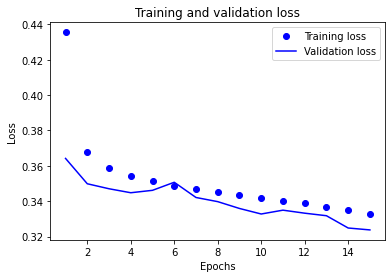

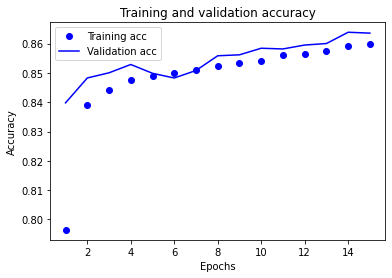

In [332]:
import matplotlib.pyplot as plt

history_dict = history.history

history_dict.keys()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [333]:
result = model.evaluate(x_test, y_test, verbose=2)

print(result)

1545/1545 - 4s - loss: 0.3723 - accuracy: 0.8397
[0.372335284948349, 0.8397014737129211]


Adam

In [59]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=15, batch_size=60, validation_data=(x_train, y_train))

Epoch 1/15
2419/2419 [==============================] - 47s 19ms/step - loss: 0.4148 - accuracy: 0.8060 - val_loss: 0.3253 - val_accuracy: 0.8666
Epoch 2/15
2419/2419 [==============================] - 46s 19ms/step - loss: 0.3344 - accuracy: 0.8551 - val_loss: 0.2969 - val_accuracy: 0.8728
Epoch 3/15
2419/2419 [==============================] - 47s 19ms/step - loss: 0.3095 - accuracy: 0.8650 - val_loss: 0.2841 - val_accuracy: 0.8758
Epoch 4/15
2419/2419 [==============================] - 46s 19ms/step - loss: 0.2920 - accuracy: 0.8718 - val_loss: 0.2579 - val_accuracy: 0.8870
Epoch 5/15
2419/2419 [==============================] - 46s 19ms/step - loss: 0.2769 - accuracy: 0.8785 - val_loss: 0.2415 - val_accuracy: 0.8958
Epoch 6/15
2419/2419 [==============================] - 46s 19ms/step - loss: 0.2617 - accuracy: 0.8862 - val_loss: 0.2253 - val_accuracy: 0.9064
Epoch 7/15
2419/2419 [==============================] - 45s 19ms/step - loss: 0.2465 - accuracy: 0.8937 - val_loss: 0.2141 -

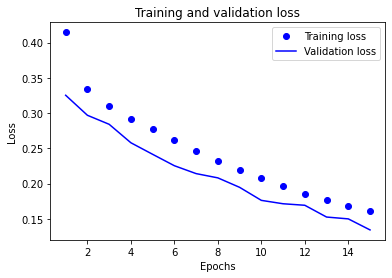

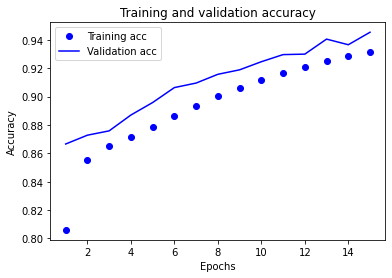

In [60]:
import matplotlib.pyplot as plt

history_dict = history.history

history_dict.keys()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [61]:
result = model.evaluate(x_test, y_test, verbose=2)

print(result)

1545/1545 - 3s - loss: 0.7000 - accuracy: 0.8187
[0.7000346183776855, 0.8186654448509216]
